In [96]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
RAW_DATA_PATH_P = './robot_lab/P'
RAW_DATA_PATH_PD = './robot_lab/PD'
RAW_DATA_PATH_PDI = './robot_lab/PDI'

SAVE_DATA_PATH = './data/'

In [98]:
def lvm_to_list(file):
    loop = []
    angle = []
    with open(file, 'r') as f:
        text = f.read().split()
        for i in range(len(text)):
            if i % 2 == 0:
                loop.append(float(text[i]))
            elif i % 2 == 1:
                angle.append(float(text[i]))
    return loop, angle        

In [99]:
def make_file_path_list(dir_path):
    l = os.listdir(dir_path)
    return list(map(lambda x: dir_path + '/'+ x, l))

In [110]:
def find_low_v_return_index(ls, num):
    mean = [] #平均格納用
    v = []  #分散格納用
    n = num  #n個ずつ分割
    split_list = [ls[i: i + n] for i in range(0, len(ls), n)]
    split_list.pop()
    #print(split_list)
    for j in range(len(split_list)):
        mean.append(sum(split_list[j]) / len(split_list[j]))
        v.append((sum(map(lambda t: (t - mean[j])*(t - mean[j]), split_list[j]))) / len(split_list[j]))
    return max([i for i,j in enumerate(v) if j == min(v)])

In [111]:
test = [43,43,3,3,4,5,3,3,4,5,3,2,4,5,3,3,4,5,3,3,4,2,11,26,5,76,54,43]
print(test)
n = 3
print(find_low_v_return_index(test, 3))

[43, 43, 3, 3, 4, 5, 3, 3, 4, 5, 3, 2, 4, 5, 3, 3, 4, 5, 3, 3, 4, 2, 11, 26, 5, 76, 54, 43]
6


In [112]:
p_list = make_file_path_list(RAW_DATA_PATH_P)
pd_list = make_file_path_list(RAW_DATA_PATH_PD)
pdi_list = make_file_path_list(RAW_DATA_PATH_PDI)

dir_list = [p_list, pd_list, pdi_list]

In [113]:
print(p_list)
print(pd_list)
print(pdi_list)

kp = ["Kp=0.50","Kp=0.75","Kp=1.0","Kp=1.25","Kp=1.5","Kp=1.75"]
kd = ["Kd=0.0","Kd=0.5","Kd=1.0","Kd=2.0","Kd=3.0","Kd=4.0","Kd=5.0"]
kdi = ["Ki=0.0","Ki=0.02","Ki=0.04","Ki=0.06","Ki=0.08","Ki=0.10","Ki=0.12","Ki=0.24","Ki=0.3"]

marker = ["x","o","^","v","s","+",">",".","<","d"]

['./robot_lab/P/.ipynb_checkpoints', './robot_lab/P/data006.lvm', './robot_lab/P/data007.lvm', './robot_lab/P/data008.lvm', './robot_lab/P/data009.lvm', './robot_lab/P/data010.lvm', './robot_lab/P/data011.lvm']
['./robot_lab/PD/data012.lvm', './robot_lab/PD/data013.lvm', './robot_lab/PD/data014.lvm', './robot_lab/PD/data015.lvm', './robot_lab/PD/data016.lvm', './robot_lab/PD/data017.lvm', './robot_lab/PD/data018.lvm']
['./robot_lab/PDI/data019.lvm', './robot_lab/PDI/data020.lvm', './robot_lab/PDI/data021.lvm', './robot_lab/PDI/data022.lvm', './robot_lab/PDI/data023.lvm', './robot_lab/PDI/data024.lvm', './robot_lab/PDI/data025.lvm', './robot_lab/PDI/data026.lvm', './robot_lab/PDI/data027.lvm']


In [134]:
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 2.0# 軸の線幅edge linewidth。囲みの太さ

def draw(file_list, K, k_tag):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.xlabel("time t [s]")
    plt.ylabel("angle θ [arb.unit]")

    if k_tag == "pd":
        plt.xlim(0,5)
        plt.xticks([0,1,2,3,4,5])
    elif k_tag == "pdi":
        plt.xlim(0,5)
        plt.xticks([0,1,2,3,4,5])
    else:
        plt.xlim(0, 10)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
    
    plt.yticks([])
    plt.grid(True)
    
    n = 10
    for index, i in enumerate(file_list[1:]):
        x , y = lvm_to_list(i)
        
        t = find_low_v_return_index(y, n) #分散が最も小さい箇所の最大のindexを返す
        x = x[:t*n + n]
        y = y[:t*n + n]
        
        x = list(map(lambda t: t*0.02, x))
        y = list(map(lambda t: t + index*120, y))
        plt.plot(x, y,'-',marker=marker[index],linewidth = 0.5, markersize=2.5, label=K[index])

    plt.legend(loc = "lower right", borderaxespad = 0, fontsize = 12)

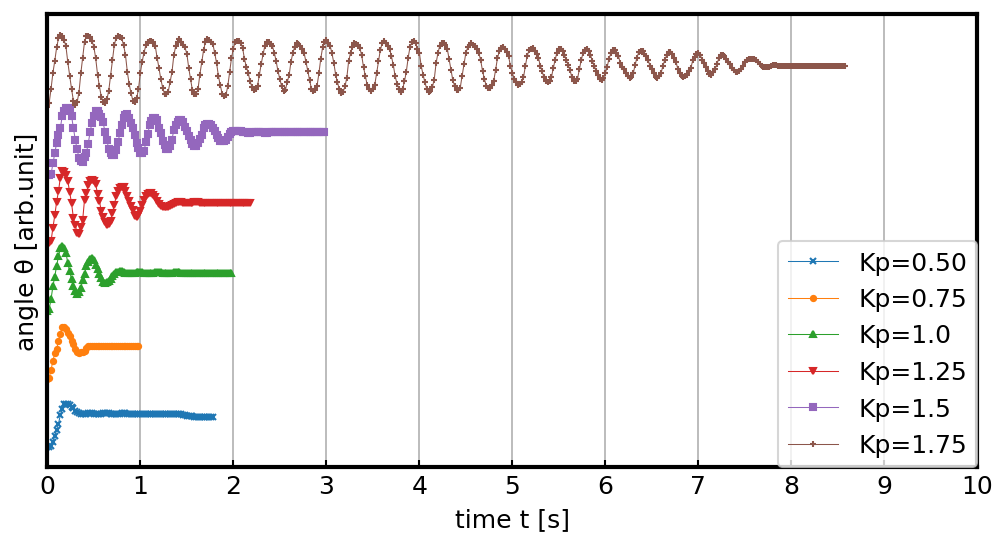

In [135]:
draw(p_list, kp, "p")

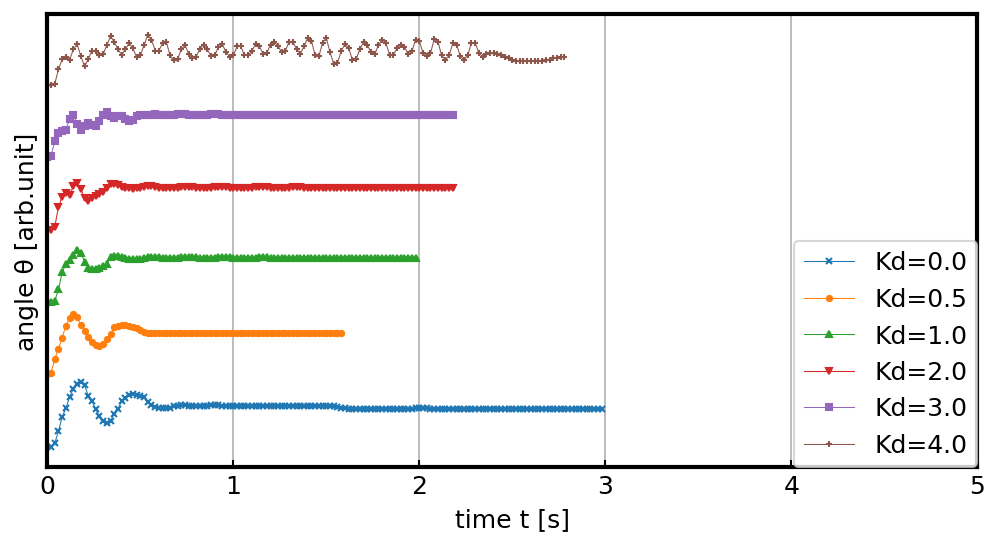

In [136]:
draw(pd_list, kd, "pd")

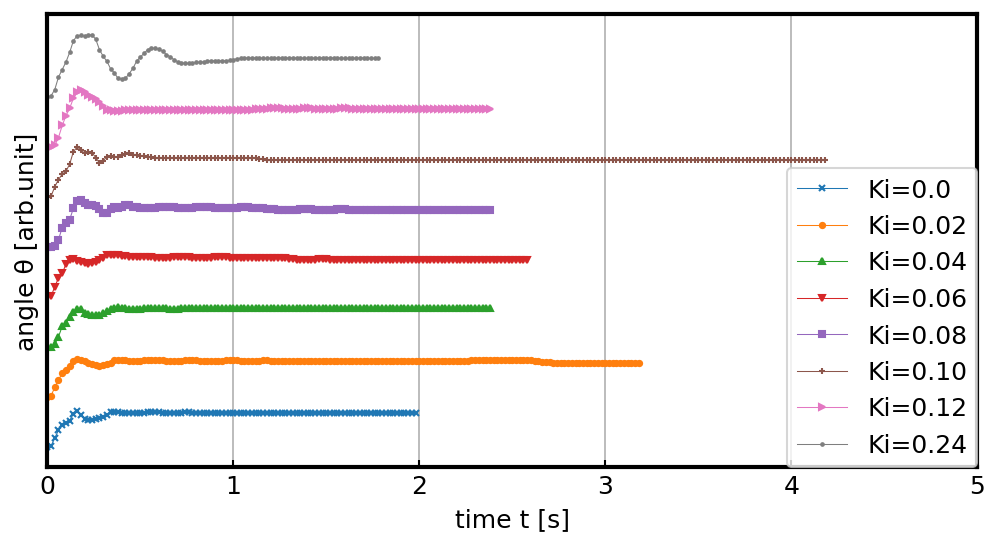

In [137]:
draw(pdi_list, kdi, "pdi")